#### 1. 数据预处理

数据预处理任务：清洗数据，处理缺失值，提取用户浏览记录。首先我们读取数据集文件并创建一个空的数据框，而后解析数据集文件并提前用户联系记录：

In [1]:
import pandas as pd
data = pd.DataFrame(columns=['FromNodeId', 'ToNodeId'])

In [2]:
with open("./Email-Enron.txt","r") as f:
    lines = f.readlines()

for line in lines:
    line_split = line.replace("\n", "").replace("\r", "").split('\t')
    # print(line_split)
    data = pd.concat([data, pd.DataFrame({'FromNodeId': [int(line_split[0])], 'ToNodeId': [int(line_split[1])]})], ignore_index=True)
    
data = data.dropna()
data

,FromNodeId,ToNodeId
0,0,1
1,1,0
2,1,2
3,1,3
4,1,4
...,...,...
367657,36688,36686
367658,36688,36687
367659,36689,36690
367660,36690,36689


#### 2. 数据探索性分析
数据探索性分析任务：分析最常被访问的用户、用户访问量分布等。首先，我们可以计算每个用户的访问量，并找出最常使用的用户：

In [3]:
import matplotlib.pyplot as plt

# 计算每个用户的访问量
users_visits = data['ToNodeId'].value_counts()

# 找出最常被访问的用户
most_visited_users = users_visits.head(30)

# 打印最常被访问的用户
print("最常使用的用户：")
print(most_visited_users)

最常使用的用户：
ToNodeId
5038    1383
273     1367
458     1261
140     1245
1028    1244
195     1143
370     1099
1139    1068
136     1026
566      924
823      908
292      834
588      829
76       815
416      791
286      711
353      705
734      686
851      666
1824     609
478      607
95       597
893      591
516      552
444      542
520      540
647      539
652      538
343      537
543      521
Name: count, dtype: int64


接下来，我们可以绘制用户访问量的分布图：

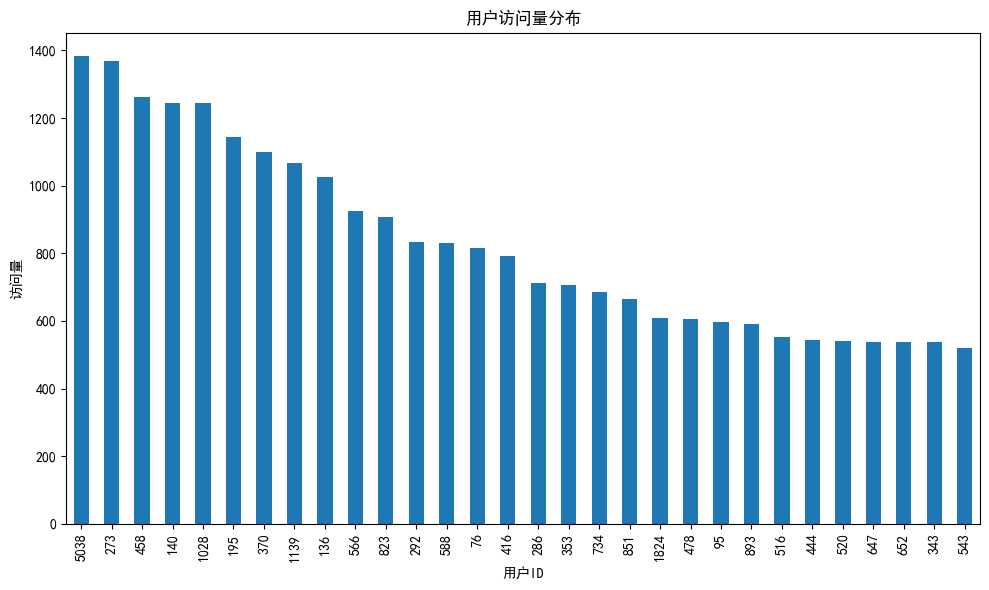

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文字体（示例为SimHei）

# 绘制页面访问量的分布图
plt.figure(figsize=(10, 6))
most_visited_users.plot(kind='bar')
plt.xlabel("用户ID")
plt.ylabel("访问量")
plt.title("用户访问量分布")
plt.tight_layout()  # 自动调整图像布局
plt.show()

#### 3.关联规则挖掘

关联规则挖取任务：使用Apriori算法或FP-growth算法，根据用户使用记录计算频繁项集和关联规则。关联规则挖掘是一种常用的数据挖掘技术，可以从数据集中发现项集之间的关联关系。 在这个任务中，我们将使用Apriori算法来计算频繁项集和关联规则。

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
# 将数据集转换成适合Apriori算法处理的形式
user_data = []
last_user = 0
tmp = []

for index, row in data.iterrows():
    user1_id = row['FromNodeId']
    user2_id = row['ToNodeId']
        
    if user1_id == last_user:
        tmp.append(user2_id)
    else:
        user_data.append(tmp)
        tmp = []
        tmp.append(user2_id)
    last_user = user1_id

user_data.append(tmp)
# user_data

te = TransactionEncoder()
data_encoded = te.fit_transform(user_data)
df = pd.DataFrame(data_encoded, columns=te.columns_)

df

,0,1,2,3,4,5,6,7,8,9,...,36682,36683,36684,36685,36686,36687,36688,36689,36690,36691
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
36688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
36689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
# 使用Apriori算法计算频繁项集
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# 打印频繁项集
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets


#### 4. 结果评估

无强相关